# CONSUMER COMPLAINT ANALYSIS

In this project, we will analyze customer complaints based on the submitted platform, product, sub-product, issue, sub-issue, company response, and timely response. For this analysis, I have downloaded a dataset containing 62,516 rows and 12 columns.

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
dataset=pd.read_excel('Consumer_Complaints.xlsx')

In [3]:
#checking whether the dataset is properly loaded or not
dataset

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Sub-issue,Company public response,Company response to consumer,Timely response?
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,NaN,Company has responded to the consumer and the ...,Closed with monetary relief,Yes
2,5818349,Web,2022-07-27,2022-07-27,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",NaN,In progress,NaN
4,5820224,Referral,2022-07-27,2022-07-28,VA,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Company has responded to the consumer and the ...,Closed with explanation,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
62511,2501211,Web,2017-06-04,2017-06-04,TX,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,Company has responded to the consumer and the ...,Closed with explanation,Yes
62512,2472406,Referral,2017-05-01,2017-05-05,VA,Checking or savings account,Other banking product or service,Problem caused by your funds being low,Non-sufficient funds and associated fees,Company has responded to the consumer and the ...,Closed with explanation,Yes
62513,3704015,Web,2020-06-17,2020-06-17,TN,"Credit reporting, credit repair services, or o...",Credit repair services,Confusing or missing disclosures,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes
62514,2488973,Referral,2017-05-19,2017-05-19,GA,Mortgage,Other type of mortgage,Trouble during payment process,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes


In [4]:
#checking for the description using the pandas function
dataset.describe()

,Complaint ID
count,6.251600e+04
mean,4.512642e+06
std,1.442917e+06
min,2.471340e+06
25%,3.254020e+06
50%,4.178582e+06
75%,5.771284e+06
max,7.458912e+06


In [5]:
#getting the information of the dataset 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62516 entries, 0 to 62515
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Complaint ID                  62516 non-null  int64         
 1   Submitted via                 62516 non-null  object        
 2   Date submitted                62516 non-null  datetime64[ns]
 3   Date received                 62516 non-null  datetime64[ns]
 4   State                         62516 non-null  object        
 5   Product                       62516 non-null  object        
 6   Sub-product                   62509 non-null  object        
 7   Issue                         62516 non-null  object        
 8   Sub-issue                     51658 non-null  object        
 9   Company public response       60341 non-null  object        
 10  Company response to consumer  62516 non-null  object        
 11  Timely response?            

In [6]:
#cheking the null values in the dataset
dataset.isnull().sum()

Complaint ID                        0
Submitted via                       0
Date submitted                      0
Date received                       0
State                               0
Product                             0
Sub-product                         7
Issue                               0
Sub-issue                       10858
Company public response          2175
Company response to consumer        0
Timely response?                 1494
dtype: int64

# Data Cleaning, Wrangling and EDA

In [7]:
#checking for the N/A valus in the dataset
dataset.isna().sum()

Complaint ID                        0
Submitted via                       0
Date submitted                      0
Date received                       0
State                               0
Product                             0
Sub-product                         7
Issue                               0
Sub-issue                       10858
Company public response          2175
Company response to consumer        0
Timely response?                 1494
dtype: int64

In [8]:
#checking for the duplicated values in the dataset
dataset.duplicated().sum()

0

In [9]:
dataset['Date submitted'] = pd.to_datetime(dataset['Date submitted'])
dataset['Date received'] = pd.to_datetime(dataset['Date received'])

In [10]:
dataset['Year submitted'] = dataset['Date submitted'].dt.year
dataset['Month submitted'] = dataset['Date submitted'].dt.month
dataset['Day submitted'] = dataset['Date submitted'].dt.day
dataset['Weekday submitted'] = dataset['Date submitted'].dt.weekday  # 0 = Monday, 6 = Sunday

In [11]:
dataset['Date submitted'].value_counts()

2023-07-12    183
2023-07-13    148
2023-07-11    108
2023-07-14     98
2023-07-15     81
             ... 
2019-05-26      1
2023-08-24      1
2019-08-25      1
2023-08-20      1
2018-07-28      1
Name: Date submitted, Length: 2308, dtype: int64

In [12]:
dataset['Date received'].value_counts()

2023-07-12    184
2023-07-13    148
2023-07-11    110
2023-07-14     98
2023-08-08     89
             ... 
2023-08-25      1
2019-05-27      1
2019-07-14      1
2023-08-28      1
2019-04-21      1
Name: Date received, Length: 2305, dtype: int64

In [13]:
dataset

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Sub-issue,Company public response,Company response to consumer,Timely response?,Year submitted,Month submitted,Day submitted,Weekday submitted
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes,2021,10,24,6
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,NaN,Company has responded to the consumer and the ...,Closed with monetary relief,Yes,2020,4,24,4
2,5818349,Web,2022-07-27,2022-07-27,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes,2022,7,27,2
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",NaN,In progress,NaN,2023,7,10,0
4,5820224,Referral,2022-07-27,2022-07-28,VA,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Company has responded to the consumer and the ...,Closed with explanation,Yes,2022,7,27,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62511,2501211,Web,2017-06-04,2017-06-04,TX,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,Company has responded to the consumer and the ...,Closed with explanation,Yes,2017,6,4,6
62512,2472406,Referral,2017-05-01,2017-05-05,VA,Checking or savings account,Other banking product or service,Problem caused by your funds being low,Non-sufficient funds and associated fees,Company has responded to the consumer and the ...,Closed with explanation,Yes,2017,5,1,0
62513,3704015,Web,2020-06-17,2020-06-17,TN,"Credit reporting, credit repair services, or o...",Credit repair services,Confusing or missing disclosures,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes,2020,6,17,2
62514,2488973,Referral,2017-05-19,2017-05-19,GA,Mortgage,Other type of mortgage,Trouble during payment process,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes,2017,5,19,4


In [14]:
#checking the different submitted values
dataset.value_counts(dataset['Submitted via'])

Submitted via
Web             45423
Referral        10766
Phone            4684
Postal mail      1318
Fax               233
Web Referral       90
Email               2
dtype: int64

Text(0.5, 0.98, 'Submitted platfrom')

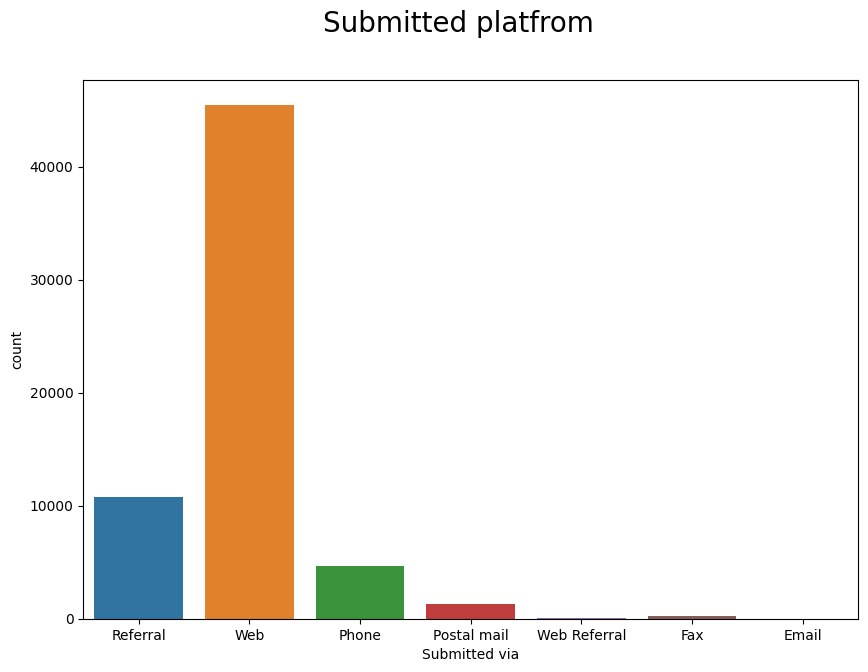

In [15]:
plt.figure(figsize=(10,7))
sns.countplot(data=dataset,x='Submitted via')
plt.suptitle('Submitted platfrom',fontsize=20)

In [16]:
#checking for the different state in a dataset
dataset.value_counts(dataset['State'])

State
CA    13709
FL     6488
TX     4686
NY     4442
GA     2921
NJ     2664
IL     2270
MA     2141
MD     1959
VA     1731
NC     1717
PA     1676
WA     1530
AZ     1516
MI     1395
NV     1221
CT     1097
SC      822
TN      758
OH      731
MO      674
OR      620
CO      576
MN      382
DC      353
IN      316
KS      311
OK      293
WI      291
AL      269
DE      268
AR      266
RI      249
LA      246
NM      219
UT      201
NH      199
KY      157
IA      154
ME      152
MS      141
ID      122
HI      111
AK      110
NE       83
WV       77
MT       70
VT       54
SD       34
ND       22
WY       22
dtype: int64

Text(0.5, 0.98, 'State data in the dataset')

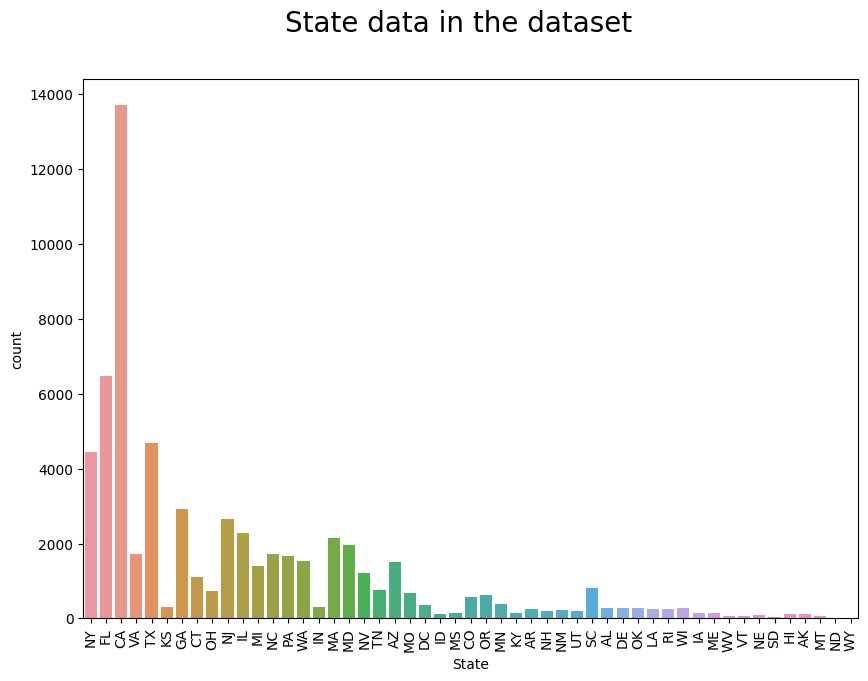

In [17]:
plt.figure(figsize=(10,7))
sns.countplot(data=dataset,x='State')
plt.xticks(rotation=90)
plt.suptitle('State data in the dataset',fontsize=20)

In [18]:
#checking for the values in the product column of a dataset
dataset.value_counts(dataset['Product'])

Product
Checking or savings account                                                     24814
Credit card or prepaid card                                                     16197
Credit reporting, credit repair services, or other personal consumer reports     7710
Mortgage                                                                         6601
Money transfer, virtual currency, or money service                               3453
Debt collection                                                                  2736
Vehicle loan or lease                                                             633
Payday loan, title loan, or personal loan                                         333
Student loan                                                                       39
dtype: int64

Text(0.5, 0.98, 'Product data')

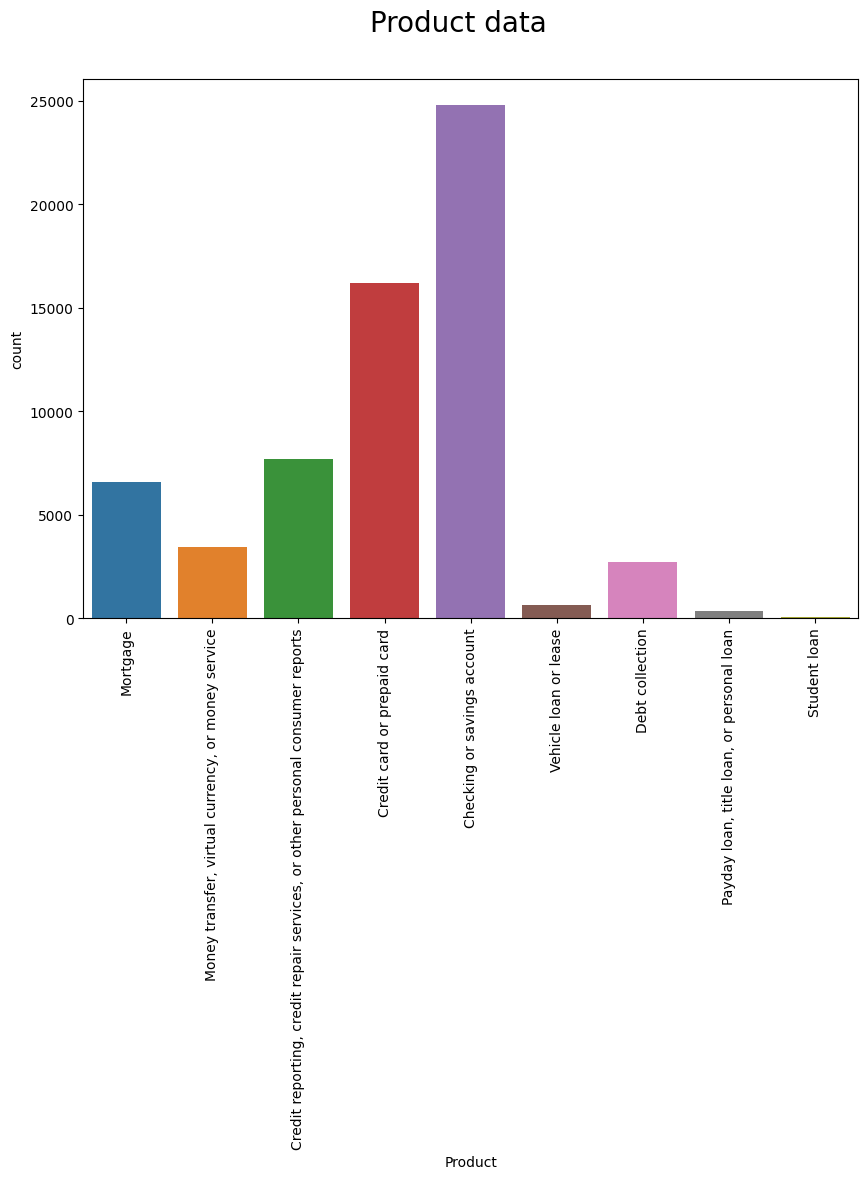

In [19]:
plt.figure(figsize=(10,7))
sns.countplot(data=dataset,x='Product')
plt.xticks(rotation=90)
plt.suptitle('Product data',fontsize=20)

In [20]:
#Since, we know there is a missing data in the sub-product column filling let's first analyze how many data's are missing
dataset['Sub-product'].isnull().sum()

7

In [21]:
#checking for the available value's in the sub-product column
dataset['Sub-product'].value_counts()

Checking account                              20768
General-purpose credit card or charge card    13404
Credit reporting                               7340
Conventional home mortgage                     3767
Other banking product or service               2568
Government benefit card                        2429
Domestic (US) money transfer                   1773
Credit card debt                               1697
Savings account                                1239
Home equity loan or line of credit (HELOC)     1105
Other type of mortgage                          949
Mobile or digital wallet                        655
FHA mortgage                                    642
Loan                                            629
International money transfer                    411
Mortgage debt                                   341
I do not know                                   314
Other personal consumer report                  299
Other debt                                      282
General-purp

In [22]:
#Let's full the missing values in a dataset using the most available value in the same colunn
#since there is checking account is the most used values as per the previous value count function using it.
dataset['Sub-product'].fillna('Checking account',inplace=True)

In [23]:
#now let's check if the values have been filled in the column
dataset['Sub-product'].isnull().sum()

0

Text(0.5, 0.98, 'Sub-product data')

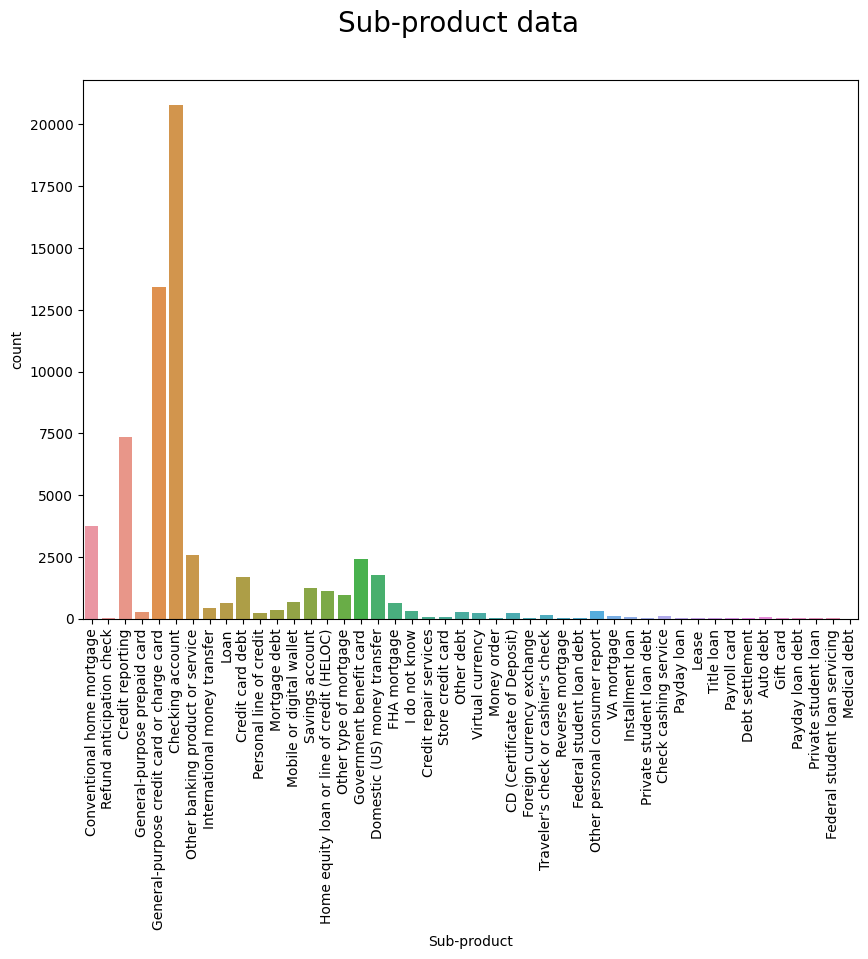

In [24]:
plt.figure(figsize=(10,7))
sns.countplot(data=dataset,x='Sub-product')
plt.xticks(rotation=90)
plt.suptitle('Sub-product data',fontsize=20)

In [25]:
#Checking the values available in the issue column
dataset['Issue'].value_counts()

Managing an account                                  15109
Incorrect information on your report                  4931
Problem with a purchase shown on your statement       4415
Closing an account                                    2953
Trouble during payment process                        2827
                                                     ...  
Can't stop withdrawals from your bank account            2
Was approved for a loan, but didn't receive money        1
Vehicle was damaged or destroyed the vehicle             1
Problem with an overdraft                                1
Vehicle was repossessed or sold the vehicle              1
Name: Issue, Length: 76, dtype: int64

In [26]:
#Checking if there is any null value in the issue column
dataset['Issue'].isnull().sum()

0

In [27]:
#Checking the number of values in the sub-issue column in a dataset
dataset['Sub-issue'].value_counts()

Deposits and withdrawals                                                            5596
Problem using a debit or ATM card                                                   3356
Credit card company isn't resolving a dispute about a purchase on your statement    2770
Information belongs to someone else                                                 2401
Company closed your account                                                         2312
                                                                                    ... 
Card opened without my consent or knowledge                                            1
Threatened to turn you in to immigration or deport you                                 1
Can't temporarily delay making payments                                                1
Keep getting calls about your loan                                                     1
Problem with a trade-in                                                                1
Name: Sub-issue, Leng

In [28]:
#checking the no values in the dataset
dataset['Sub-issue'].isnull().sum()

10858

In [29]:
#Filling the missing values in a dataset
dataset['Sub-issue'].fillna('General-purpose prepaid card',inplace=True)

In [30]:
#Checking if the value is filled in the dataset
dataset['Sub-issue'].isnull().sum()

0

In [31]:
#Checking for the values available in the company public response column
dataset['Company public response'].value_counts()

Company has responded to the consumer and the CFPB and chooses not to provide a public response                            60311
Company believes the complaint provided an opportunity to answer consumer's questions                                         12
Company believes the complaint is the result of a misunderstanding                                                             7
Company believes it acted appropriately as authorized by contract or law                                                       6
Company believes complaint caused principally by actions of third party outside the control or direction of the company        3
Company disputes the facts presented in the complaint                                                                          2
Name: Company public response, dtype: int64

In [32]:
#Checking if there is any null values available in the dataset
dataset['Company public response'].isnull().sum()

2175

In [33]:
#let's fill the missing values in the Company public response column
dataset['Company public response'].fillna('Company has responded to the consumer and the CFPB and chooses not to provide a public response',inplace=True)

In [34]:
#Let's check if the value's have been properly filled in the dataset
dataset['Company public response'].isnull().sum()

0

In [35]:
#Checking how many values are there in the timely response column
dataset['Timely response?'].value_counts()

Yes    58619
No      2403
Name: Timely response?, dtype: int64

In [36]:
#Let's check for the missing value's in the Timely response column
dataset['Timely response?'].isnull().sum()

1494

In [37]:
#filling the missing values in the dataset
dataset['Timely response?'].fillna('Yes',inplace=True)

Text(0.5, 0.98, 'Timely Response')

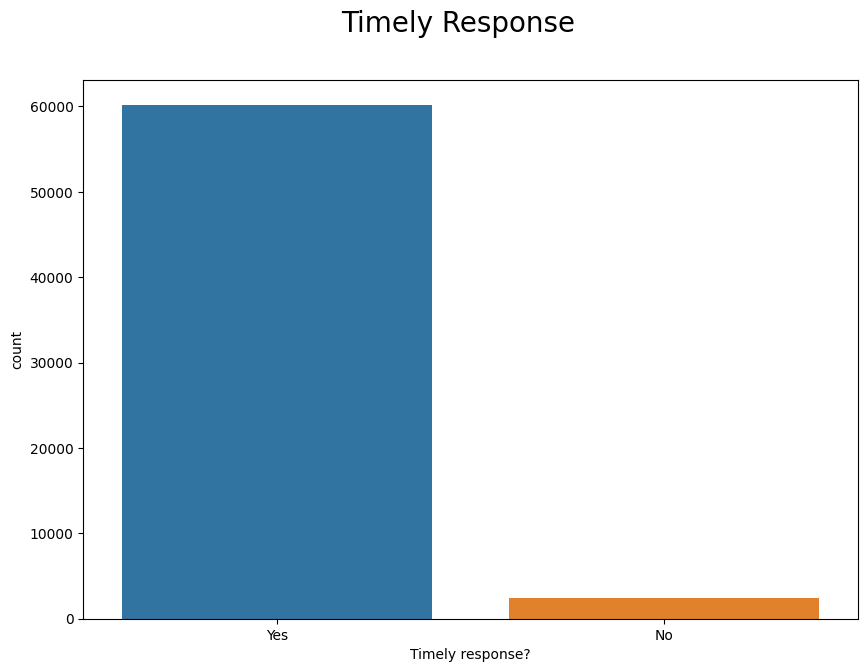

In [38]:
plt.figure(figsize=(10,7))
sns.countplot(data=dataset,x='Timely response?')
plt.suptitle('Timely Response',fontsize=20)

In [39]:
complaints_over_time = dataset.groupby('Date submitted')['Complaint ID'].count().reset_index()
complaints_over_time

,Date submitted,Complaint ID
0,2017-05-01,37
1,2017-05-02,31
2,2017-05-03,31
3,2017-05-04,38
4,2017-05-05,37
...,...,...
2303,2023-08-22,5
2304,2023-08-23,5
2305,2023-08-24,1
2306,2023-08-25,1


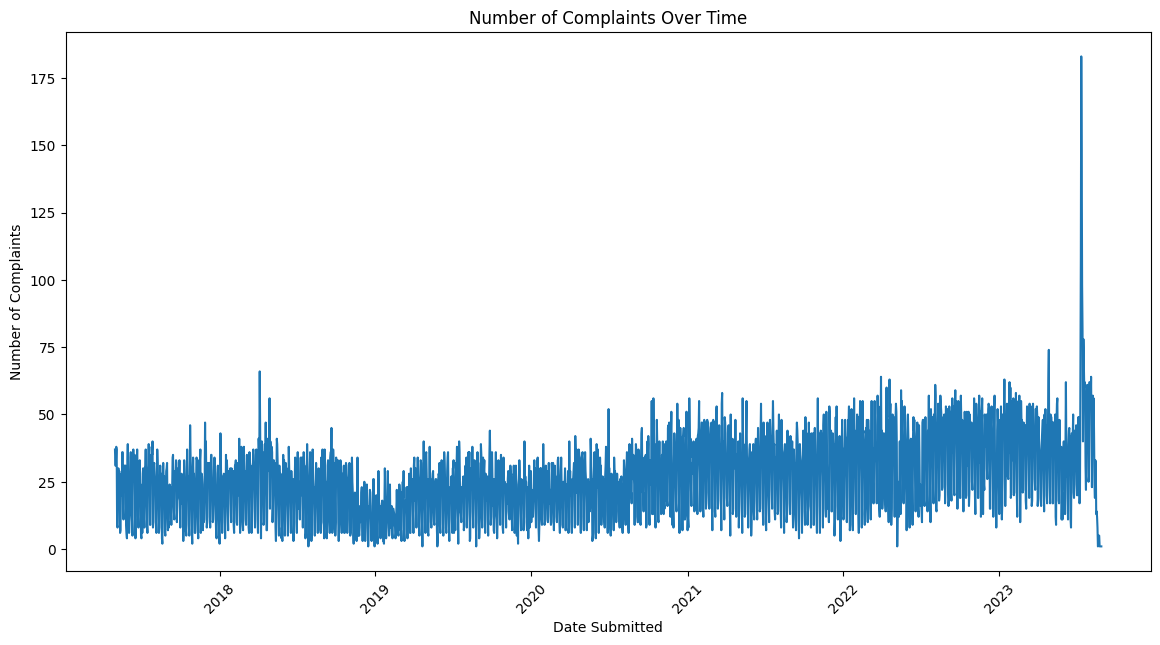

In [40]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=complaints_over_time, x='Date submitted', y='Complaint ID')
plt.title('Number of Complaints Over Time')
plt.xlabel('Date Submitted')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

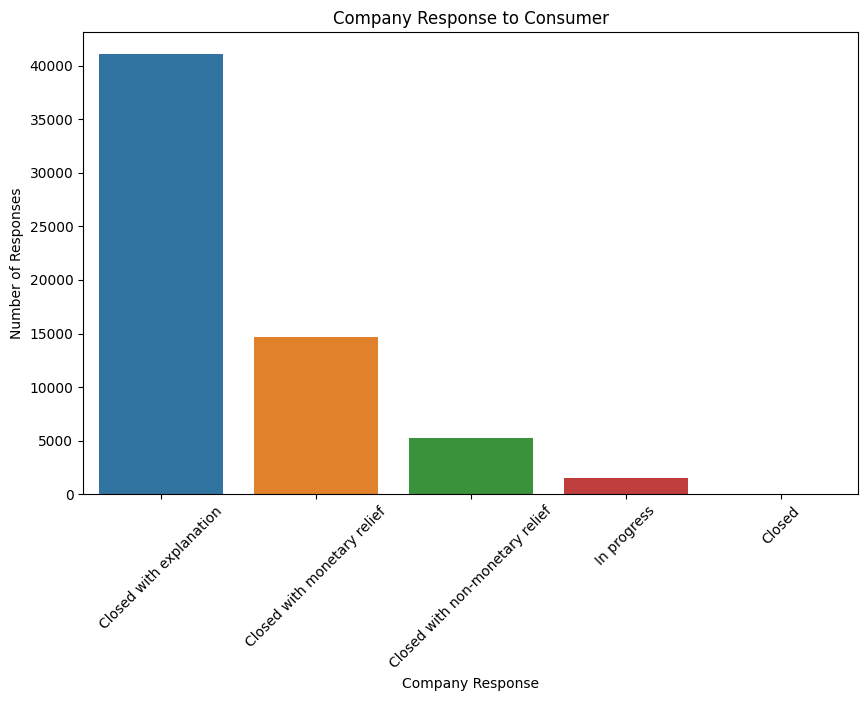

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Company response to consumer', order=dataset['Company response to consumer'].value_counts().index)
plt.title('Company Response to Consumer')
plt.xticks(rotation=45)
plt.xlabel('Company Response')
plt.ylabel('Number of Responses')
plt.show()

From the above visualization and statistical analysis, we can clearly see that the web portal is the most frequently used platform for submitting complaints. California (CA) is the state with the highest number of complaints, with the product being "Checking for Savings Accounts" and the sub-product being "Checking Accounts."

Text(0.5, 0.98, 'Top 10 Common Issues')

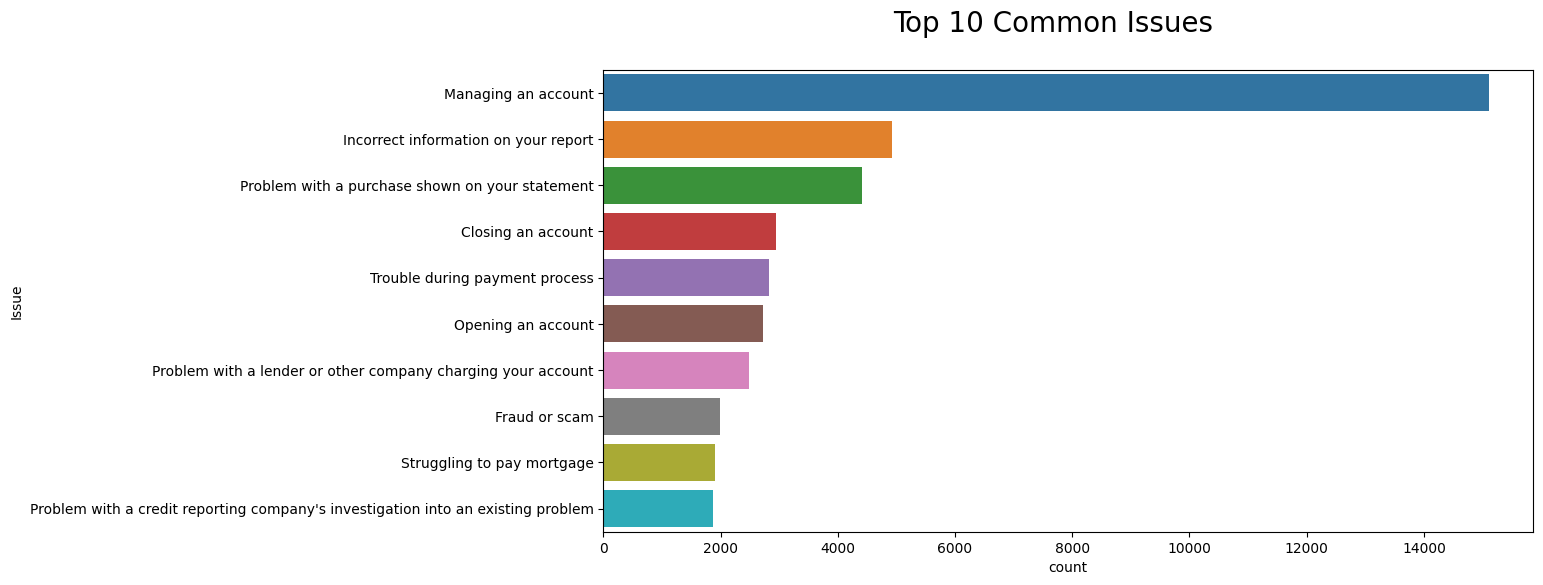

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, y='Issue', order=dataset['Issue'].value_counts().head(10).index)
plt.suptitle('Top 10 Common Issues',fontsize=20)

Text(0.5, 0.98, 'Top 10 Common Sub-Issues')

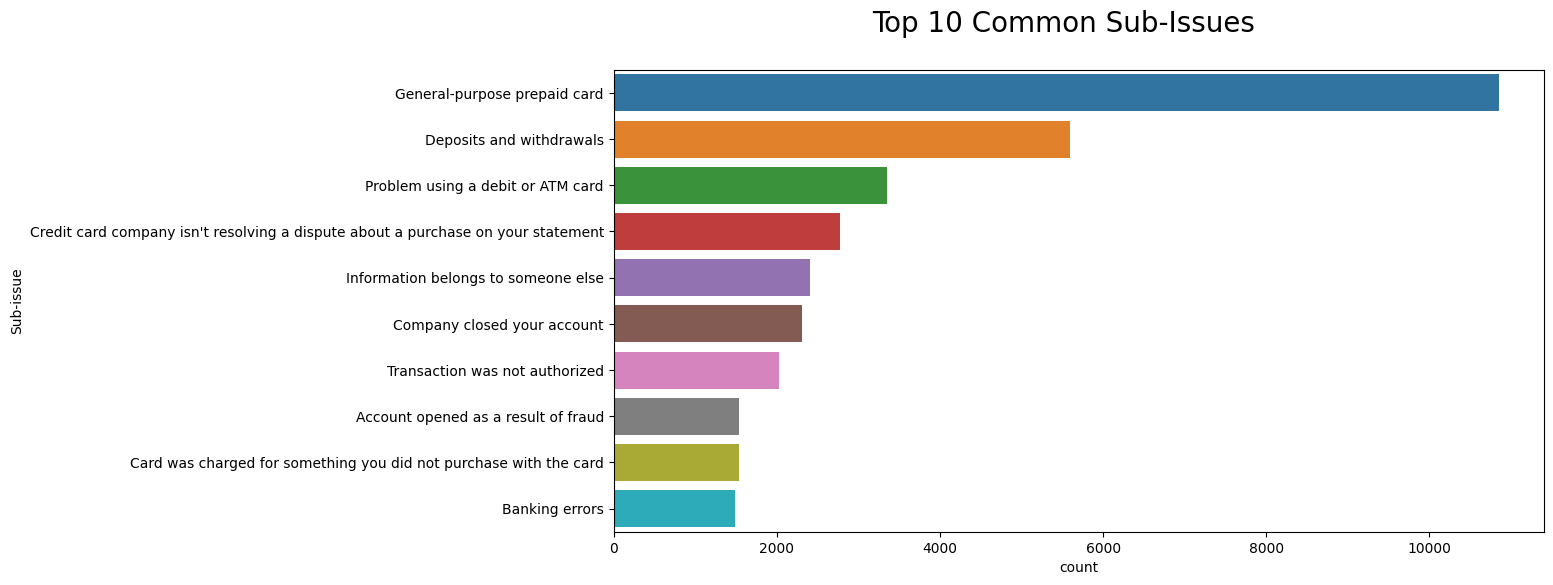

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, y='Sub-issue', order=dataset['Sub-issue'].value_counts().head(10).index)
plt.suptitle('Top 10 Common Sub-Issues',fontsize=20)

# Bivariate EDA Analysis

In the following analysis, we will classify consumer complaints based on the portal, state, products, issue, and sub-issue.

Text(0.5, 0.98, 'State wise platform details')

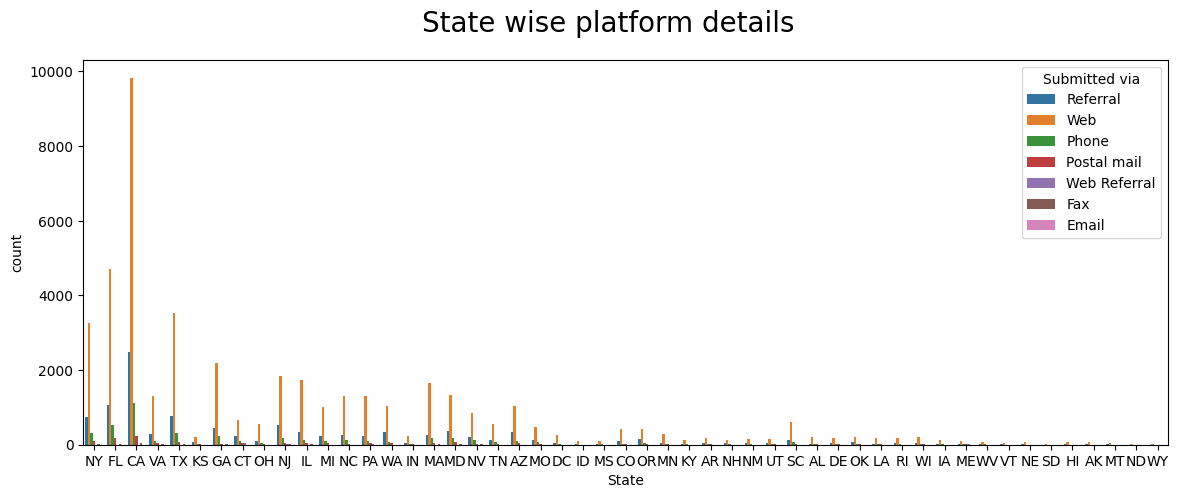

In [44]:
plt.figure(figsize=(14,5))
sns.countplot(data=dataset,x='State',hue='Submitted via')
plt.suptitle('State wise platform details',fontsize=20)

Text(0.5, 0.98, 'State wise product details')

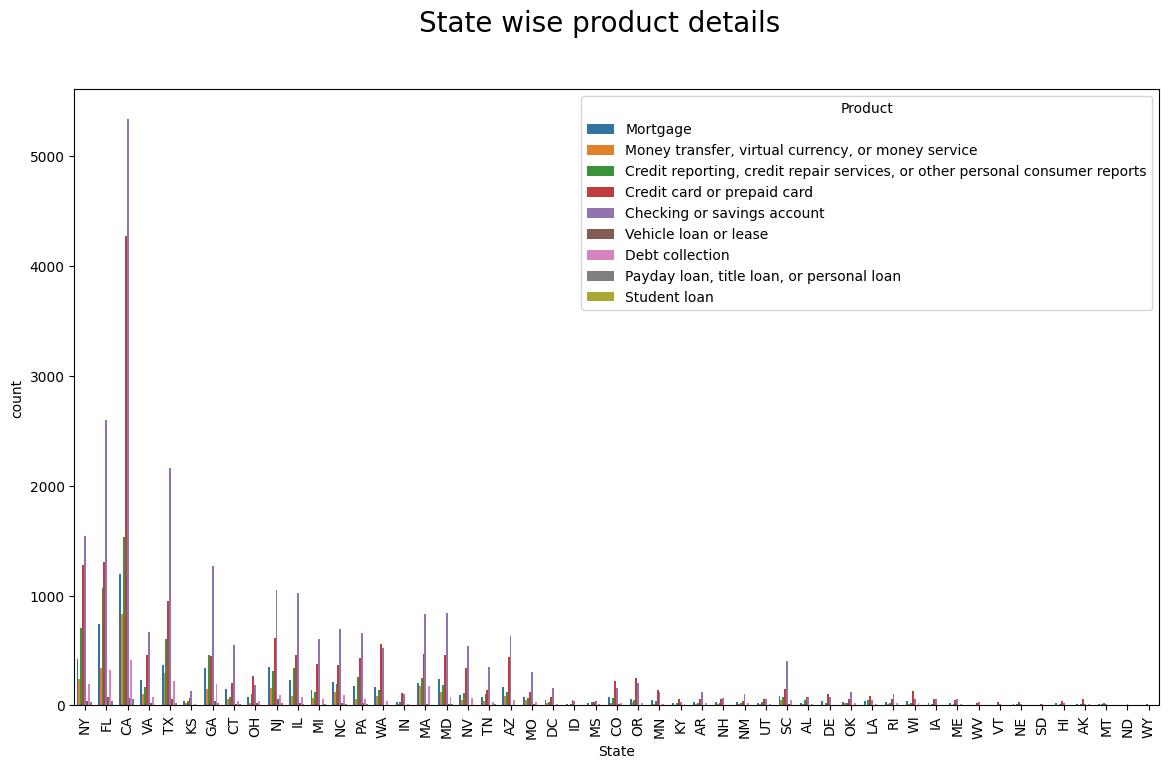

In [45]:
plt.figure(figsize=(14,8))
sns.countplot(data=dataset,x='State',hue='Product')
plt.xticks(rotation=90)
plt.suptitle('State wise product details',fontsize=20)

Text(0.5, 0.98, 'Customer queries submitted via')

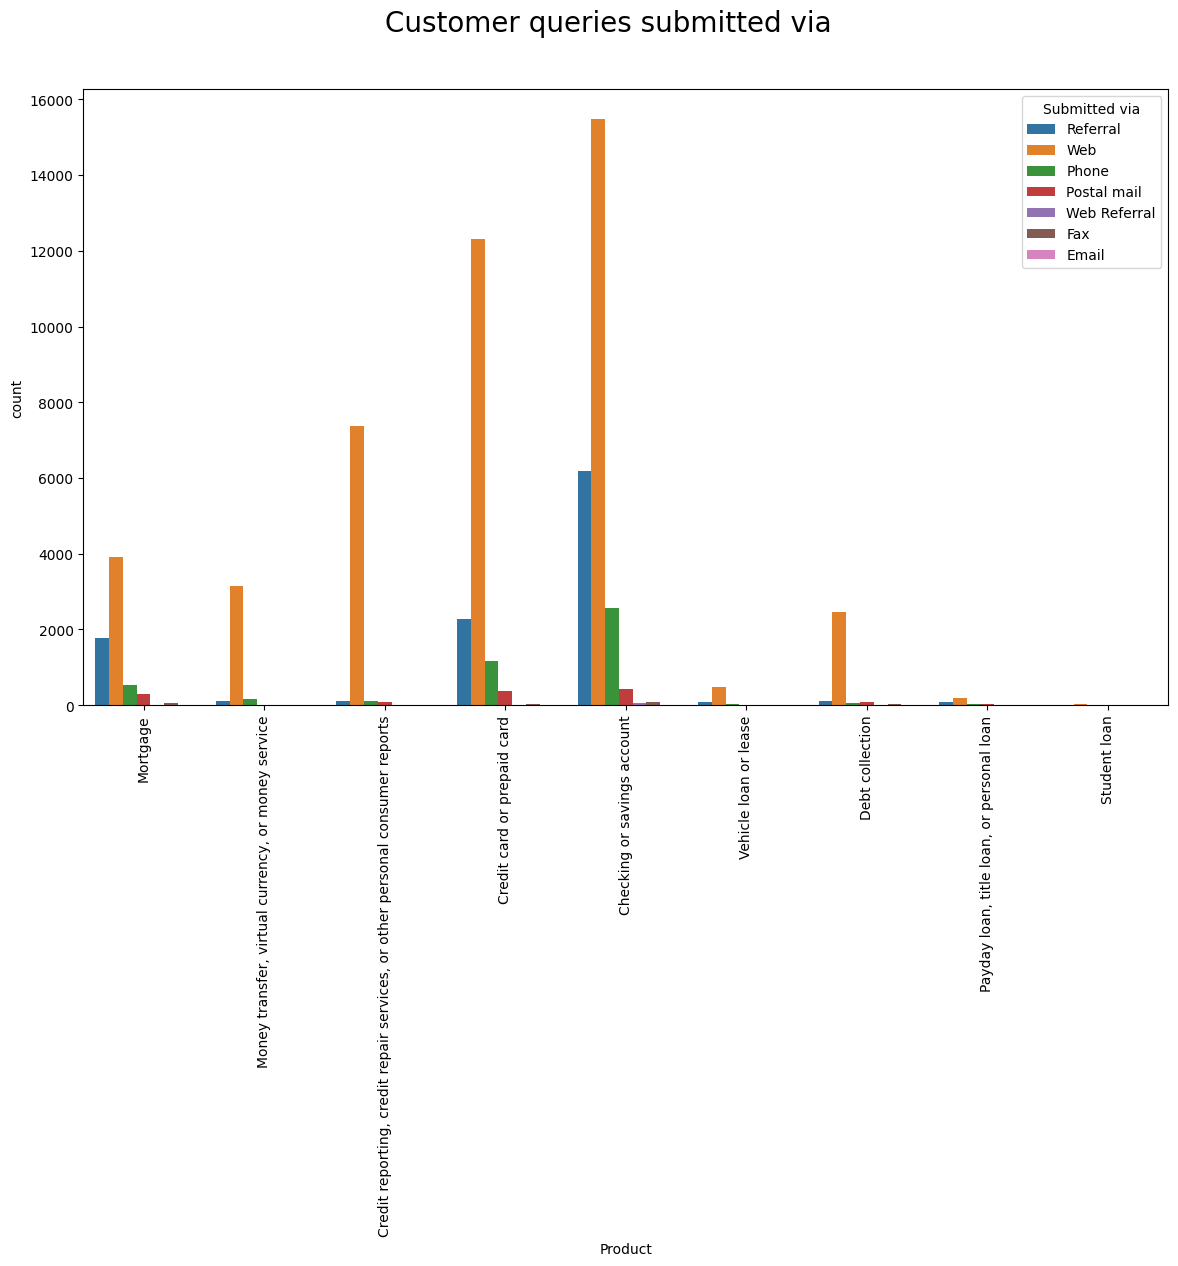

In [46]:
plt.figure(figsize=(14,8))
sns.countplot(data=dataset,x='Product',hue='Submitted via')
plt.xticks(rotation=90)
plt.suptitle('Customer queries submitted via',fontsize=20)

Text(0.5, 0.98, 'Platform wise Response')

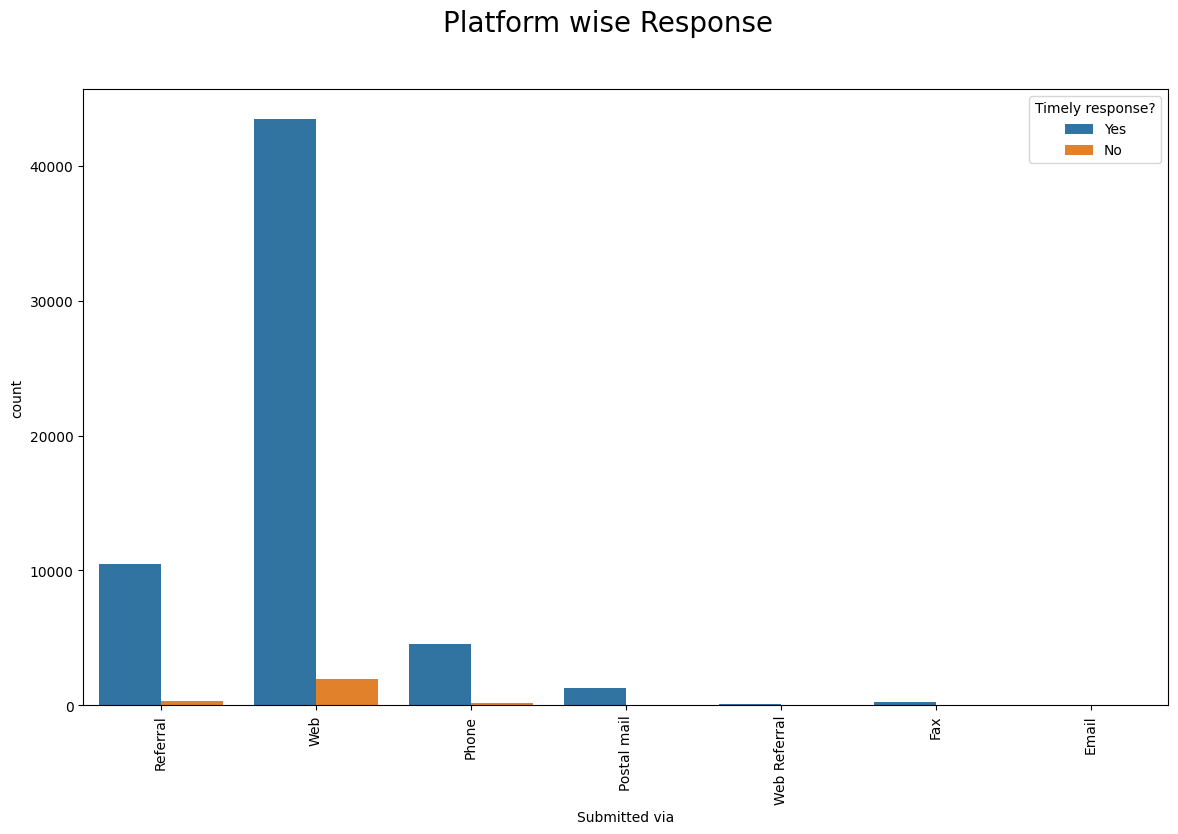

In [47]:
plt.figure(figsize=(14,8))
sns.countplot(data=dataset,x='Submitted via',hue='Timely response?')
plt.xticks(rotation=90)
plt.suptitle('Platform wise Response',fontsize=20)

Text(0.5, 0.98, 'State wise Response')

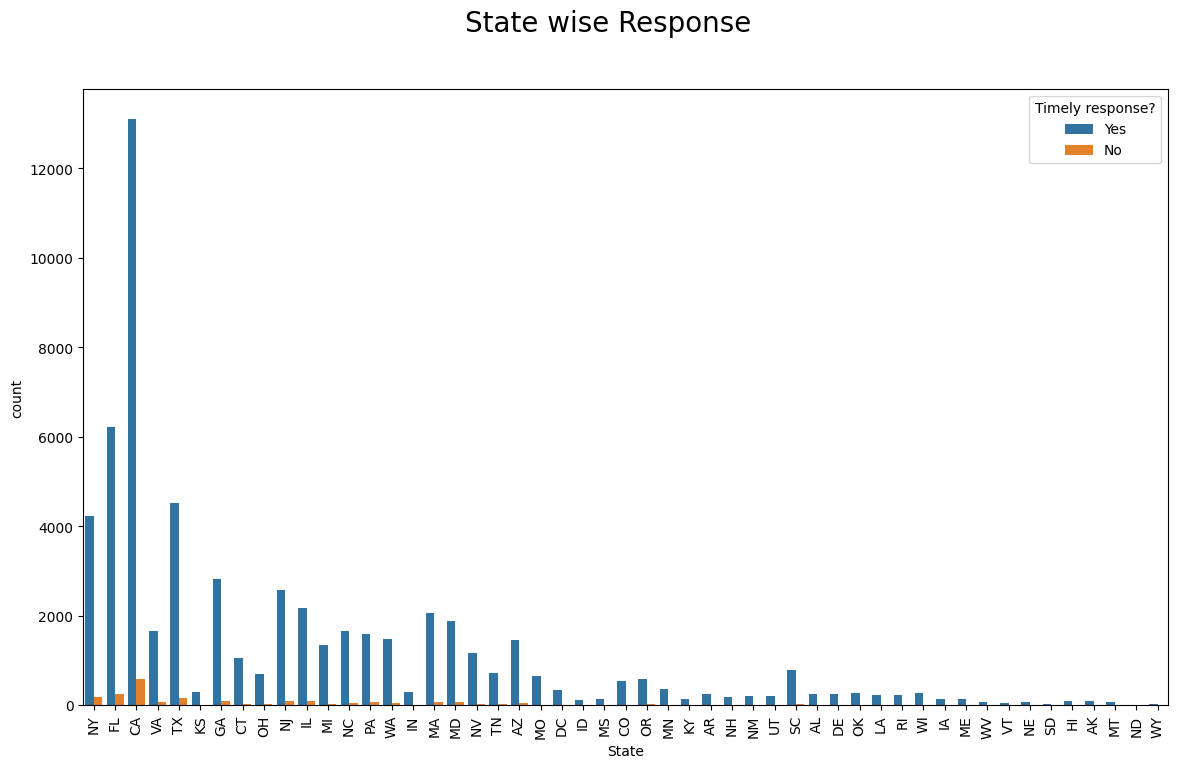

In [48]:
plt.figure(figsize=(14,8))
sns.countplot(data=dataset,x='State',hue='Timely response?')
plt.xticks(rotation=90)
plt.suptitle('State wise Response',fontsize=20)

Text(0.5, 0.98, 'Product Wise Response')

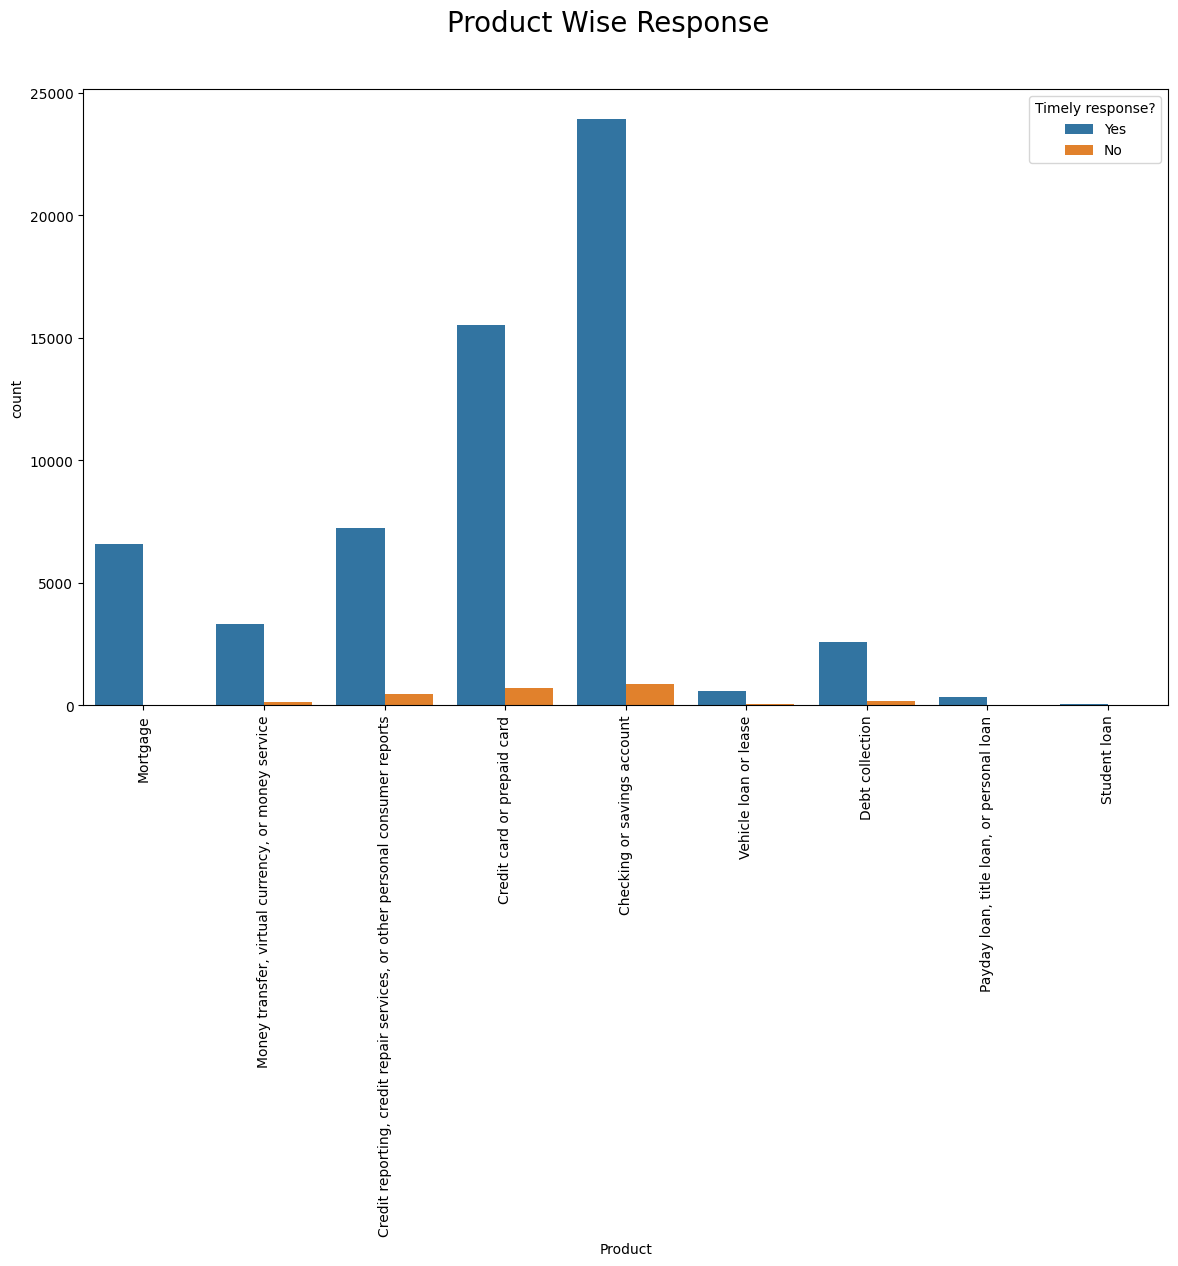

In [49]:
plt.figure(figsize=(14,8))
sns.countplot(data=dataset,x='Product',hue='Timely response?')
plt.xticks(rotation=90)
plt.suptitle('Product Wise Response',fontsize=20)

# Feature Engineering

In [50]:
dataset['Complaints_Per_State'] = dataset.groupby('State')['Complaint ID'].transform('count')

In [51]:
dataset['Complaints_Per_Product'] = dataset.groupby('Product')['Complaint ID'].transform('count')

In [52]:
dataset['Complaints_Per_Product_Per_State'] = dataset.groupby(['State', 'Product'])['Complaint ID'].transform('count') / dataset['Complaints_Per_State']

In [53]:
dataset

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Sub-issue,Company public response,Company response to consumer,Timely response?,Year submitted,Month submitted,Day submitted,Weekday submitted,Complaints_Per_State,Complaints_Per_Product,Complaints_Per_Product_Per_State
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,General-purpose prepaid card,Company has responded to the consumer and the ...,Closed with explanation,Yes,2021,10,24,6,4442,6601,0.094777
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,General-purpose prepaid card,Company has responded to the consumer and the ...,Closed with monetary relief,Yes,2020,4,24,4,6488,3453,0.052867
2,5818349,Web,2022-07-27,2022-07-27,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes,2022,7,27,2,13709,7710,0.111606
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",Company has responded to the consumer and the ...,In progress,Yes,2023,7,10,0,13709,16197,0.311547
4,5820224,Referral,2022-07-27,2022-07-28,VA,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Company has responded to the consumer and the ...,Closed with explanation,Yes,2022,7,27,2,1731,16197,0.264009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62511,2501211,Web,2017-06-04,2017-06-04,TX,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,Company has responded to the consumer and the ...,Closed with explanation,Yes,2017,6,4,6,4686,24814,0.460521
62512,2472406,Referral,2017-05-01,2017-05-05,VA,Checking or savings account,Other banking product or service,Problem caused by your funds being low,Non-sufficient funds and associated fees,Company has responded to the consumer and the ...,Closed with explanation,Yes,2017,5,1,0,1731,24814,0.385326
62513,3704015,Web,2020-06-17,2020-06-17,TN,"Credit reporting, credit repair services, or o...",Credit repair services,Confusing or missing disclosures,General-purpose prepaid card,Company has responded to the consumer and the ...,Closed with explanation,Yes,2020,6,17,2,758,7710,0.139842
62514,2488973,Referral,2017-05-19,2017-05-19,GA,Mortgage,Other type of mortgage,Trouble during payment process,General-purpose prepaid card,Company has responded to the consumer and the ...,Closed with explanation,Yes,2017,5,19,4,2921,6601,0.117768


# ----- THE END -----